In [77]:
import pandas as pd
import numpy as np

In [78]:
df = pd.read_csv('salary_prediction_dataset.csv')
df

,Age,Experience_years,Education_level,Tech_Skills,Soft_Skills,Salary_USD
0,59,2,1,4,4,29431.0
1,49,5,3,1,9,42375.0
2,35,7,2,5,2,36989.0
3,28,26,4,7,9,90795.0
4,41,8,3,6,1,45132.0
...,...,...,...,...,...,...
145,59,26,2,5,5,75102.0
146,53,1,2,5,6,30596.0
147,21,25,4,4,1,79236.0
148,47,16,1,3,5,47831.0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [80]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [81]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
r2

0.9159888740501997

Text(0.5, 1.0, 'Actual vs Predicted Salary')

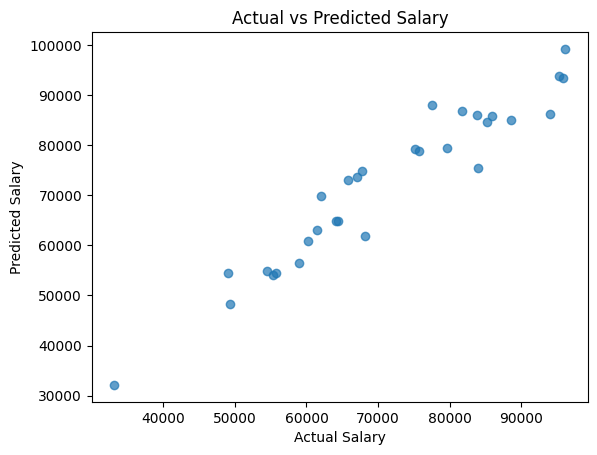

In [85]:
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs Predicted Salary")